In [1]:
## LSTM Implementation

In [ ]:
# import pandas as pd
# import numpy as np
# import torch
# from torch import nn
# from torch.utils.data import DataLoader, Dataset
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from sklearn.model_selection import train_test_split

# # Step 1: Load and preprocess the data
# df = pd.read_csv("netflix_single_user_balanced_pattern_v5.csv")
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# # Feature scaling
# scaler = MinMaxScaler()
# df[['usage_minutes', 'signal_strength', 'latency', 'bandwidth_speed_per_sec_mbps']] = scaler.fit_transform(
#     df[['usage_minutes', 'signal_strength', 'latency', 'bandwidth_speed_per_sec_mbps']]
# )

# # Encode categorical features
# label_encoders = {
#     col: LabelEncoder().fit(df[col]) for col in ['service_group', 'service_name', 'device_type']
# }
# for col, encoder in label_encoders.items():
#     df[col] = encoder.transform(df[col])

# # Create sequences
# sequence_length = 96  # 1 day with 15-minute intervals
# features = ['usage_minutes', 'signal_strength', 'latency', 'bandwidth_speed_per_sec_mbps', 'service_group']
# target = 'service_group'

# def create_sequences(data, seq_length, target_col):
#     sequences, targets = [], []
#     for i in range(len(data) - seq_length):
#         seq = data.iloc[i:i + seq_length][features].values
#         label = data.iloc[i + seq_length][target_col]
#         sequences.append(seq)
#         targets.append(label)
#     return np.array(sequences), np.array(targets)

# X, y = create_sequences(df, sequence_length, target)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: Define the LSTM model
# class LSTMModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
#         super(LSTMModel, self).__init__()
#         self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_dim, output_dim)

#     def forward(self, x):
#         out, _ = self.lstm(x)
#         out = self.fc(out[:, -1, :])  # Use the last hidden state
#         return out

# input_dim = len(features)
# hidden_dim = 64
# output_dim = len(label_encoders['service_group'].classes_)

# model = LSTMModel(input_dim, hidden_dim, output_dim)

# # Step 3: Define training components
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Create DataLoaders
# train_loader = DataLoader(
#     list(zip(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))),
#     batch_size=32,
#     shuffle=True
# )

# val_loader = DataLoader(
#     list(zip(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))),
#     batch_size=32,
#     shuffle=False
# )

# # Step 4: Train the model
# for epoch in range(10):
#     # Training loop
#     model.train()
#     train_loss = 0
#     for X_batch, y_batch in train_loader:
#         optimizer.zero_grad()
#         y_pred = model(X_batch)
#         loss = criterion(y_pred, y_batch)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()
#     print(f"Epoch {epoch+1}, Training Loss: {train_loss / len(train_loader):.4f}")

#     # Validation loop
#     model.eval()
#     val_loss = 0
#     with torch.no_grad():
#         for X_val_batch, y_val_batch in val_loader:
#             y_val_pred = model(X_val_batch)
#             val_loss += criterion(y_val_pred, y_val_batch).item()
#     print(f"Epoch {epoch+1}, Validation Loss: {val_loss / len(val_loader):.4f}")

# # Step 5: Evaluate the model
# def evaluate_accuracy(model, loader):
#     model.eval()
#     correct, total = 0, 0
#     with torch.no_grad():
#         for X_batch, y_batch in loader:
#             y_pred = model(X_batch)
#             y_pred_classes = torch.argmax(y_pred, dim=1)
#             correct += (y_pred_classes == y_batch).sum().item()
#             total += y_batch.size(0)
#     return correct / total

# train_accuracy = evaluate_accuracy(model, train_loader)
# val_accuracy = evaluate_accuracy(model, val_loader)

# print(f"Training Accuracy: {train_accuracy:.4f}")
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# # Step 6: Save the model
# torch.save(model.state_dict(), "lstm_model.pth")
# print("Model saved as lstm_model.pth")


In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:

# Enable memory growth for GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth set for GPU")
    except RuntimeError as e:
        print(f"Error setting memory growth: {e}")


Error setting memory growth: Physical devices cannot be modified after being initialized


In [ ]:

# Step 1: Load and preprocess the data
df = pd.read_csv("netflix_single_user_balanced_pattern_v5.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [ ]:

# Feature scaling
scaler = MinMaxScaler()
df[['usage_minutes', 'signal_strength', 'latency', 'bandwidth_speed_per_sec_mbps']] = scaler.fit_transform(
    df[['usage_minutes', 'signal_strength', 'latency', 'bandwidth_speed_per_sec_mbps']]
)


In [ ]:

# Encode categorical features
label_encoders = {
    col: LabelEncoder().fit(df[col]) for col in ['service_group', 'service_name', 'device_type']
}
for col, encoder in label_encoders.items():
    df[col] = encoder.transform(df[col])


In [ ]:

# Create sequences
sequence_length = 96  # 1 day with 15-minute intervals
features = ['usage_minutes', 'signal_strength', 'latency', 'bandwidth_speed_per_sec_mbps', 'service_group']
target = 'service_group'

def create_sequences(data, seq_length, target_col):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length][features].values
        label = data.iloc[i + seq_length][target_col]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)


In [ ]:

# Create sequences
X, y = create_sequences(df, sequence_length, target)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Step 2: Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(sequence_length, len(features))),  # Input layer
    tf.keras.layers.LSTM(64, return_sequences=False),  # LSTM layer
    tf.keras.layers.Dense(len(label_encoders['service_group'].classes_), activation='softmax')  # Output layer
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:

# Step 3: Train the model with a reduced batch size
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16,  # Reduce batch size for memory optimization
    verbose=1
)


In [ ]:

# Step 4: Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:

# Step 5: Save the model
model.save("lstm_model_tf")
print("Model saved as 'lstm_model_tf'")


In [ ]:

# Step 6: Plot training and validation performance
# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid()
plt.show()


Error setting memory growth: Physical devices cannot be modified after being initialized


Epoch 1/10


2024-11-21 15:33:53.331123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-11-21 15:33:53.370319: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


3351/3351 [==============================] - 61s 17ms/step - loss: 0.7350 - accuracy: 0.6579 - val_loss: 0.5809 - val_accuracy: 0.7086
Epoch 2/10
3351/3351 [==============================] - 54s 16ms/step - loss: 0.5980 - accuracy: 0.7006 - val_loss: 0.5380 - val_accuracy: 0.7119
Epoch 3/10
3351/3351 [==============================] - 55s 16ms/step - loss: 0.5417 - accuracy: 0.7176 - val_loss: 0.5513 - val_accuracy: 0.7043
Epoch 4/10
3351/3351 [==============================] - 54s 16ms/step - loss: 0.5161 - accuracy: 0.7273 - val_loss: 0.5116 - val_accuracy: 0.7333
Epoch 5/10
3351/3351 [==============================] - 55s 16ms/step - loss: 0.5152 - accuracy: 0.7290 - val_loss: 0.5058 - val_accuracy: 0.7279
Epoch 6/10
3351/3351 [==============================] - 55s 16ms/step - loss: 0.5032 - accuracy: 0.7314 - val_loss: 0.4971 - val_accuracy: 0.7233
Epoch 7/10
3351/3351 [==============================] - 55s 16ms/step - loss: 0.4941 - accuracy: 0.7343 - val_loss: 0.5003 - val_accura

INFO:tensorflow:Assets written to: lstm_model_tf/assets


Model saved as 'lstm_model_tf'


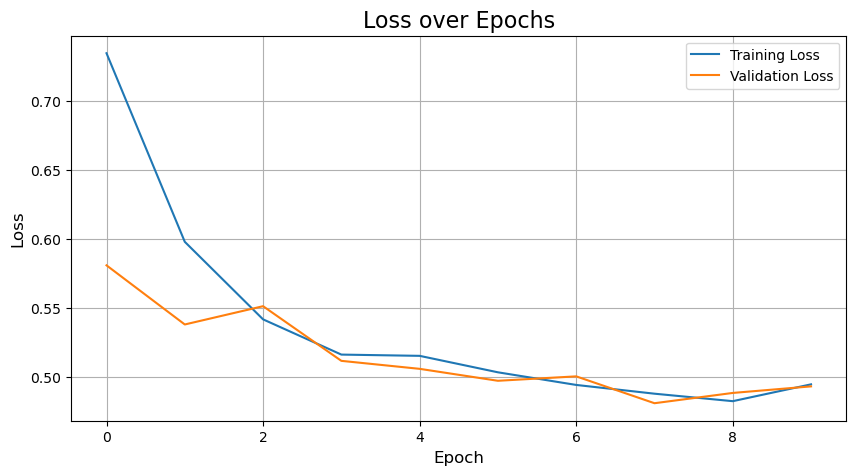

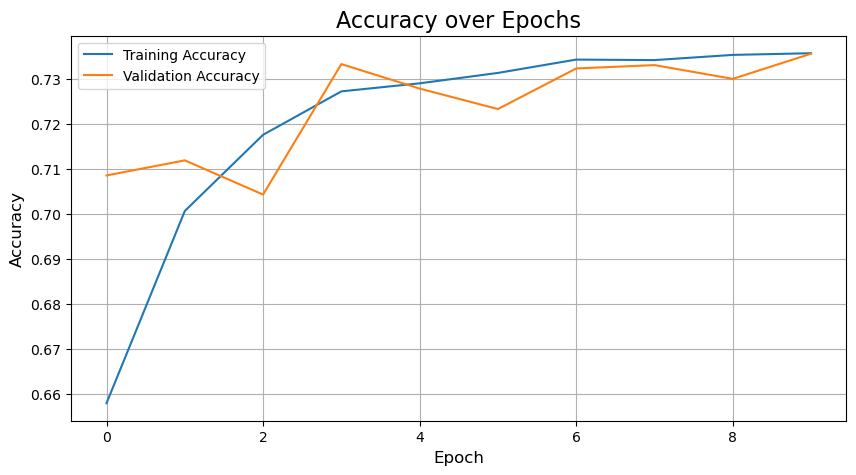

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Enable memory growth for GPUs (must be done before initializing TensorFlow)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth set for GPU")
    except RuntimeError as e:
        print(f"Error setting memory growth: {e}")

# Step 1: Load and preprocess the data
df = pd.read_csv("netflix_single_user_balanced_pattern_v5.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Feature scaling
scaler = MinMaxScaler()
df[['usage_minutes', 'signal_strength', 'latency', 'bandwidth_speed_per_sec_mbps']] = scaler.fit_transform(
    df[['usage_minutes', 'signal_strength', 'latency', 'bandwidth_speed_per_sec_mbps']]
)

# Encode categorical features
label_encoders = {
    col: LabelEncoder().fit(df[col]) for col in ['service_group', 'service_name', 'device_type']
}
for col, encoder in label_encoders.items():
    df[col] = encoder.transform(df[col])

# Create sequences
sequence_length = 96  # 1 day with 15-minute intervals
features = ['usage_minutes', 'signal_strength', 'latency', 'bandwidth_speed_per_sec_mbps', 'service_group']
target = 'service_group'

def create_sequences(data, seq_length, target_col):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length][features].values
        label = data.iloc[i + seq_length][target_col]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

# Create sequences
X, y = create_sequences(df, sequence_length, target)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(sequence_length, len(features))),  # Input layer
    tf.keras.layers.LSTM(64, return_sequences=False),  # LSTM layer
    tf.keras.layers.Dense(len(label_encoders['service_group'].classes_), activation='softmax')  # Output layer
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Step 3: Train the model with a reduced batch size
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16,  # Reduce batch size for memory optimization
    verbose=1
)

# Step 4: Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Step 5: Save the model
model.save("lstm_model_tf")
print("Model saved as 'lstm_model_tf'")

# Step 6: Plot training and validation performance
# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid()
plt.show()
